<a href="https://colab.research.google.com/github/mkxdxdxd/CSED101/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_max_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Settings

### 1) Import required libraries

In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import random

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import matplotlib as mpl

### 2) Hyperparameters

In [ ]:
learning_rate = 1e-3
batch_size = 100
epochs =  3000

# 2. Data

### 1) Generate data

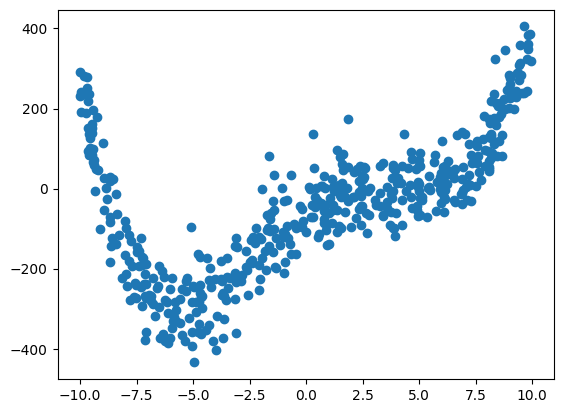

499


In [ ]:
#data 만들기
np.random.seed(1)
X= [np.random.uniform(-10,10) for _ in range(1, 500)]
X=torch.tensor(X,dtype=torch.float32)
#print(X)
Y =[0.1*(value+9)*((value-4)**3) for value in X]

Y_gauss = Y+np.random.normal(0, 60, 499)
Y_gauss = torch.tensor(Y_gauss,dtype=torch.float32)
#print(Y_gauss)
plt.plot(X,Y_gauss,'o')
plt.show()
print(len(X))

In [ ]:
X=X.unsqueeze(1)
Y_gauss = Y_gauss.unsqueeze(1)

In [ ]:
#dataset tensor로 변환
X_train, X_test, y_train, y_test = train_test_split(X,Y_gauss, test_size=0.6, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size=0.5, random_state=42)
#dataset 나누기
print("train:", len(X_train))
print("test:", len(X_test))
print("val:", len(X_valid))

train: 199
test: 150
val: 150


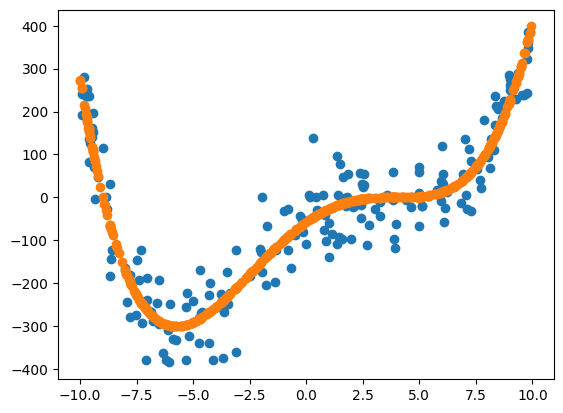

In [ ]:
plt.plot(X_train,y_train,'o')
plt.plot(X,Y,'o')
plt.show()

### 2) Dataset reduction

In [ ]:
import numpy as np
import copy


def max_min_reduction(N, X_train_new, y_train_new, weight_num) :

  # N=3
  # X_train_new = []
  # y_train_new = []
  # weight_num = []

  num_vector = [[] for i in range(N)]
  x_avg = [0.0 for i in range(N)]
  y_avg = [0.0 for i in range(N)]

  min_x = min(X_train)
  ux = (max(X_train)-min(X_train))/N

  #범위 안의 것들 append
  for i, x in enumerate(X_train) :
      y = y_train[i]
      pair = np.array([x,y]).tolist()
      for k in range(0,N) :
        if (min_x + ux*k < x <=min_x +ux*(k+1)) :
          num_vector[k].append(pair)

  print(num_vector)
  #각 점의 max-min 구하기
  for i in range(0,N) :
    if len(num_vector[i]) !=0 :
      y_max = num_vector[i][0][1][0]
      y_min = num_vector[i][0][1][0]
      for k in range(int(len(num_vector[i]))) :
        if num_vector[i][k][1][0] > y_max :
          y_max = num_vector[i][k][1][0]
        if num_vector[i][k][1][0] < y_min :
          y_min = num_vector[i][k][1][0]
        x_avg[i] += num_vector[i][k][0][0]
        y_avg[i] += num_vector[i][k][1][0]
      x_avg[i] = x_avg[i]/len(num_vector[i])
      y_avg[i] = y_avg[i]/len(num_vector[i])
      weight_num.append(len(num_vector[i]))
      with open('/weight_num_list.txt', 'a') as f:  #file내용 clear
          f.write(str(len(num_vector[i])) + '\n')
      if y_max == y_min :
        y_train_new.append(y_max)
        X_train_new.append(x_avg[i])
        with open('/X_train_new_list.txt', 'a') as f:  #file내용 clear
          f.write(str(x_avg[i]) + '\n')
        with open('/y_train_new_list.txt', 'a') as f:  #file내용 clear
          f.write(str(y_max) + '\n')
      else :
        y_train_new.append((y_max + y_min)/2)
        X_train_new.append(x_avg[i])
        with open('/y_train_new_list.txt', 'a') as f:  #file내용 clear
          f.write(str((y_max + y_min)/2) + '\n')
        with open('/X_train_new_list.txt', 'a') as f:  #file내용 clear
          f.write(str(x_avg[i]) + '\n')


    print(X_train_new)
    print(y_train_new)
    print(len(X_train_new))
    print(len(y_train_new))
    print(weight_num)


    plt.plot(X,Y,'o')
    plt.plot(X_train_new,y_train_new,'o')
    plt.grid('true')
    plt.show()

In [ ]:
X_train_new_list = []
y_train_new_list = []
weight_num_list = []

with open('/X_train_new_list.txt', 'w') as f:  #file내용 clear
    f.write('')

with open('/y_train_new_list.txt', 'w') as f:  #file내용 clear
    f.write('')

with open('/weight_num_list.txt', 'w') as f:  #file내용 clear
    f.write('')


for i in [3,5,7,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200] :

  #비우기
  X_train_new = []
  y_train_new = []
  weight_num = []

  max_min_reduction(i, X_train_new, y_train_new, weight_num)

  tensor_x = [[x] for x in X_train_new]
  tensor_y = [[y] for y in y_train_new]

  X_train_new = torch.tensor(tensor_x)
  y_train_new = torch.tensor(tensor_y)
  weight_num_new = torch.tensor(weight_num)

  X_train_new_list.append(X_train_new)
  y_train_new_list.append(y_train_new)
  weight_num_list.append(weight_num)

  print(X_train_new)
  print(y_train_new)
  print(weight_num_new)
  X_train_new.size()


# 3. Training with reduced samples

### 1) Define model

In [ ]:
class DNN(nn.Module):
  def __init__(self, input_size=1, output_size=1, hidden_units=30, num_hidden_layers=3):
    super(DNN, self).__init__()
    self.input_layer = nn.Linear(input_size, hidden_units)
    self.hidden_layers = nn.ModuleList([
        nn.Linear(hidden_units, hidden_units) for _ in range(num_hidden_layers)
    ])
    self.output_layer = nn.Linear(hidden_units, output_size)
  def forward(self, x):
    x = torch.relu(self.input_layer(x))
    for layer in self.hidden_layers:
      x = torch.relu(layer(x))
    x = self.output_layer(x)
    return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### 2) Training

In [ ]:
test_loss_history = {}
train_loss_history = {}

def train_loop(dataloader, model, loss_fn, optimizer,i):
    size = len(dataloader.dataset)
    for batch, (X, y, W) in enumerate(dataloader):
        # prediction and loss calculation
        pred = model(X)
        loss = loss_fn(pred, y)
        weighted_loss = torch.mean(W*loss)
        # Backward propagation
        optimizer.zero_grad()
        weighted_loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = weighted_loss.item(), (batch + 1) * len(X)
            if i not in train_loss_history: train_loss_history[i] = []
            train_loss_history[i].append(loss)
            print(f"Training Loss: {loss:>7f}")


def test_loop(dataloader, model, loss_fn,i):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).mean().item() #calculate test loss
    test_loss /= num_batches
    if i not in test_loss_history: test_loss_history[i] = []
    test_loss_history[i].append(test_loss)
    print(f"Test Loss(Avg.): {test_loss:>8f} \n")

In [ ]:
print("Start training")
model = {}

def training_reduction(num) : #d번째의 데이터 Reduction에 대하여 (d=0,1,2,3... (각각 N=3,10,20,30,...을 의미함))

  X_train_new = X_train_new_list[num]
  y_train_new = y_train_new_list[num]
  weight_num = weight_num_list[num]
  weight_num_new = torch.tensor(weight_num)

  print(X_train_new)
  print(y_train_new)
  print(weight_num_new)

  train_dataset_new = TensorDataset(X_train_new, y_train_new, weight_num_new)
  dataloaders = {}
  dataloaders['train'] = DataLoader(train_dataset_new, batch_size=batch_size, shuffle=False)
  dataloaders['test'] = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  dataloaders['val'] = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

  for i in range(1,13) : #10 layer에 대해
    print("# of hidden layer: ", i)
    model[i] = DNN(num_hidden_layers=i).to(device)
    loss_func = nn.MSELoss(reduction='none')
    optimizer= torch.optim.Adam(model[i].parameters(), lr=learning_rate)

    for t in range(epochs):
        print(f"Epoch {t+1}")
        train_loop(dataloaders['train'], model[i], loss_func, optimizer,i)
        test_loop(dataloaders['test'], model[i], loss_func,i)

        print(f"---------------------\n")
    print("Done!")

Start training


In [ ]:
#0,1,2,3,4,5,...20->대응->[3,5,7,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]이 있음
# data reduction 최대 N개에 대해 training
num = 1
training_reduction(num)

### 2.5) Learning curve 그리기

In [ ]:
i = 1
plt.plot(train_loss_history[i], label='train', color = 'orange')
plt.plot(test_loss_history[i], label='test', color = 'blue')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f'Loss for {i} hidden units')
plt.legend()
plt.show()
capacity_loss = {}

for i in range(1,13):
  print(f"Final Test Loss for {i}: ", test_loss_history[i][-1])
  capacity_loss[i] = test_loss_history[i][-1]

### 3) True function vs Model Prediction

7


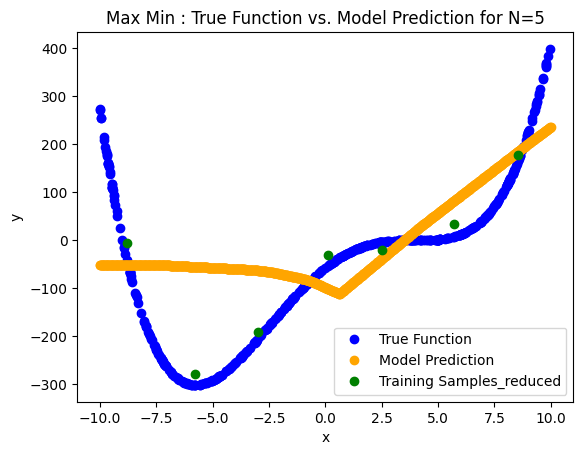

In [ ]:
17# Plot the true polynomial function and the predictions made by the model

x = torch.linspace(-10, 10, 1000).unsqueeze(1)
#x_weight = [pair[0] for pair in weight_coordinates]
#y_weight = [pair[1] for pair in weight_coordinates]

X_train_new = X_train_new_list[num]
y_train_new = y_train_new_list[num]
weight_num_new = weight_num_list[num]

i=1
N_value = 5
plt.plot(X, Y, 'o', label='True Function', color = 'blue')
plt.plot(x, model[i](x).detach().numpy(),'o', label='Model Prediction', color = 'orange')
#plt.plot(X_test, y_test, 'o', label = 'Test Samples')
plt.plot(X_train_new, y_train_new, 'o', label = 'Training Samples_reduced', color = 'green')
print(len(X_train_new))
#plt.plot(x_weight, y_weight,'o', label = 'weighted samples')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Max Min : True Function vs. Model Prediction for N={N_value}')
plt.legend()
plt.show()

### 4) Model selection

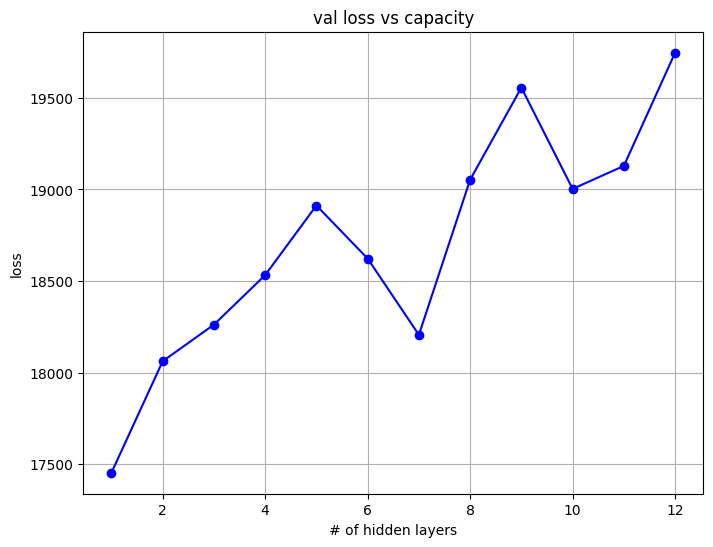

In [ ]:
### Capacity - Loss

# key, value 추출하기
keys = list(capacity_loss.keys())
values = list(capacity_loss.values())
keys_tensor = torch.tensor(keys, dtype=torch.float32)
values_tensor = torch.tensor(values, dtype=torch.float32)

# plot하기
plt.figure(figsize=(8, 6))
plt.plot(keys_tensor.numpy(), values_tensor.numpy(), marker='o', linestyle='-', color='b')
plt.xlabel('# of hidden layers')
plt.ylabel('loss')
plt.title('val loss vs capacity')
plt.grid(True)
plt.show()

### 5) Results


In [ ]:
#### redcution loss

#validation set에 대한 최적의 #of hidden layer 결정
#그 model에 대한 test loss 계산하기
def final_test_loss(dataloader, model, loss_fn,i):
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item() #calculate test loss
    test_loss /= num_batches
    print(f"Final Test Loss(Avg.): {test_loss:>8f} \n")

# optimal number of hidden layer
min_val_loss = min_key = min(capacity_loss.values())
optimal_i = min_key = min(capacity_loss, key=capacity_loss.get)
print("minimum validation loss: ", min_val_loss, "optimal_i:", optimal_i)
final_test_loss(dataloaders['test'], model[optimal_i], loss_func,i)

minimum validation loss:  17453.3603515625 optimal_i: 1
Final Test Loss(Avg.): 17453.360352 

